<a href="https://colab.research.google.com/github/vaeeeeeee/vaeee/blob/main/%E6%9C%9F%E6%9C%AB%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

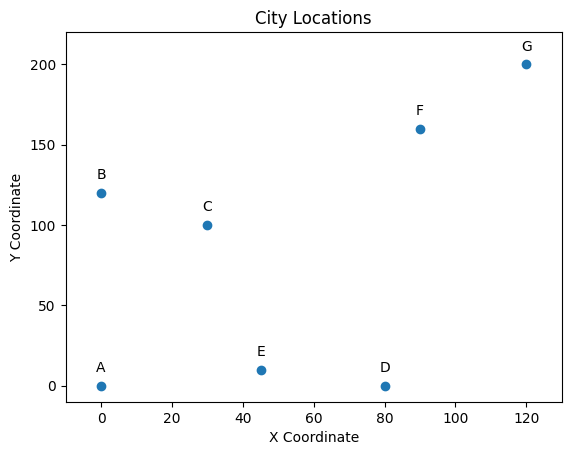

In [ ]:
import matplotlib.pyplot as plt

cities = {
    'A': (0, 0),
    'B': (0, 120),
    'C': (30, 100),
    'D': (80, 0),
    'E': (45, 10),
    'F': (90, 160),
    'G': (120, 200)
}

# Extract x and y coordinates
x = [coord[0] for coord in cities.values()]
y = [coord[1] for coord in cities.values()]

# Plot the cities
plt.scatter(x, y)

# Add labels for each city
for city, coord in cities.items():
    plt.annotate(city, coord, textcoords="offset points", xytext=(0,10), ha='center')

# Set plot title and axis labels
plt.title("City Locations")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

# Set plot limits
plt.xlim(-10, 130)
plt.ylim(-10, 220)

# Display the plot
plt.show()


In [15]:
import sys

class City:
    def __init__(self, name, coordinates, accommodation_cost):
        self.name = name
        self.coordinates = coordinates
        self.accommodation_cost = accommodation_cost

    def calculate_discounted_cost(self, previous_city):
        if previous_city is None:
            return self.accommodation_cost
        if previous_city.name == 'C' and self.name in ['A', 'G']:
            return self.accommodation_cost * 0.8
        if previous_city.name == 'D' and self.name in ['A', 'B']:
            return self.accommodation_cost * 0.8
        if previous_city.name == 'E' and self.name in ['B', 'F']:
            return self.accommodation_cost * 0.8
        if previous_city.name == 'F' and self.name in ['A', 'C']:
            return self.accommodation_cost * 0.8
        if previous_city.name == 'G' and self.name in ['E', 'F']:
            return self.accommodation_cost * 0.8
        return self.accommodation_cost

def calculate_distance(city1, city2):
    x1, y1 = city1.coordinates
    x2, y2 = city2.coordinates
    return ((x2 - x1)**2 + (y2 - y1)**2) ** 0.5

def find_cheapest_route(current_city, remaining_cities, total_cost, route, best_route, min_cost):
    if len(remaining_cities) == 0:
        if current_city.name != start_city.name:  # Exclude the cost of returning to the start city
            total_cost += current_city.calculate_discounted_cost(route[-1])
        if total_cost < min_cost:
            min_cost = total_cost
            best_route = route[:]
        return best_route, min_cost

    for next_city in remaining_cities:
        next_remaining_cities = remaining_cities[:]
        next_remaining_cities.remove(next_city)
        distance = calculate_distance(current_city, next_city)
        next_total_cost = total_cost + distance * 100
        route.append(next_city)
        best_route, min_cost = find_cheapest_route(next_city, next_remaining_cities, next_total_cost, route, best_route, min_cost)
        route.pop()

    return best_route, min_cost


A = City('A', (0, 0), 2000)
B = City('B', (0, 120), 2400)
C = City('C', (30, 100), 2400)
D = City('D', (80, 0), 1600)
E = City('E', (45, 10), 1500)
F = City('F', (90, 160), 2200)
G = City('G', (120, 200), 1200)


cities = [A, B, C, D, E, F, G]
start_city = A
remaining_cities = cities[:]
remaining_cities.remove(start_city)
total_cost = 0
route = [start_city]
best_route = None
min_cost = sys.maxsize


best_route, min_cost = find_cheapest_route(start_city, remaining_cities, total_cost, route, best_route, min_cost)


print("遊歷順序:")
for city in best_route:
    print(city.name)
print("總花費:", min_cost)


遊歷順序:
A
E
D
C
B
F
G
總花費: 39084.57613804574


In [14]:
import math

class City:
    def __init__(self, name, x, y, accommodation_cost):
        self.name = name
        self.x = x
        self.y = y
        self.accommodation_cost = accommodation_cost

def calculate_discounted_cost(current_city, previous_city):
    discount = 0.8
    if previous_city == 'A' or previous_city == 'B':
        discount = 0.8
    return current_city.accommodation_cost * discount

def calculate_distance(city1, city2):
    return math.sqrt((city2.x - city1.x) ** 2 + (city2.y - city1.y) ** 2)

A = City('A', 0, 0, 2000)
B = City('B', 0, 120, 2400)
C = City('C', 30, 100, 2400)
D = City('D', 80, 0, 1600)
E = City('E', 45, 10, 1500)
F = City('F', 90, 160, 2200)
G = City('G', 120, 200, 1200)

cities = {'A': A, 'B': B, 'C': C, 'D': D, 'E': E, 'F': F, 'G': G}

# 假設從城市A出發
current_city = 'D'
visited_cities = [current_city]
total_cost = 0

while len(visited_cities) < 7:
    min_cost = float('inf')
    next_city = None
    for city_name, city in cities.items():
        if city_name not in visited_cities:
            distance = calculate_distance(cities[current_city], city)
            accommodation_cost = calculate_discounted_cost(city, current_city)
            total_cost = total_cost + 100 * distance + accommodation_cost
            if total_cost < min_cost:
                min_cost = total_cost
                next_city = city_name
            total_cost = total_cost - (100 * distance + accommodation_cost)
    visited_cities.append(next_city)
    current_city = next_city
    total_cost = min_cost

print("遊歷順序:", visited_cities)
print("總花費:", total_cost)



遊歷順序: ['D', 'E', 'A', 'C', 'B', 'F', 'G']
總花費: 46504.54275945734
